### Exploratory Data Analysis of delivery-drivers-location Dataset

In [9]:
# importing packages 
import os, sys, warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 7)
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

In [44]:
sys.path.append('../scripts/')
from df_preproc import DataCleaning
from df_extraction import DataExtraction
dclean = DataCleaning()
dextract = DataExtraction()

#### Load the Dataset

In [17]:
# table contain information about the completed orders
df1= dextract.load_data("../data/nb.csv")

In [20]:
#table that contains delivery requests by clients (completed and unfulfilled) 
df2 = dextract.load_data("../data/driver_locations_during_request.csv")

#### Information about the Data

In [18]:
#### Information about the Data
df1.columns

Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time'],
      dtype='object')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [27]:
# checking missing value
df1.isna().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

around 1651 on  Trip Start Time  have missing values 

In [28]:
df1.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [30]:
df2.columns

Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'created_at', 'updated_at'],
      dtype='object')

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [32]:
# checking missing value
df2.isna().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

In [23]:
df2.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602,3.270,NaN,NaN
1,2,392001,243588,rejected,6.592,3.287,NaN,NaN
2,3,392001,243830,rejected,6.596,3.282,NaN,NaN
3,4,392001,243539,rejected,6.596,3.281,NaN,NaN
4,5,392001,171653,rejected,6.609,3.289,NaN,NaN


In [51]:
# merge two tables based on order_id and Trip_id
df = df2.merge(df1, how='inner', left_on='order_id',right_on="Trip ID")

In [50]:
df.columns

Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'created_at', 'updated_at', 'Trip ID', 'Trip Origin',
       'Trip Destination', 'Trip Start Time', 'Trip End Time'],
      dtype='object')

In [52]:
df.info

<bound method DataFrame.info of               id  order_id  driver_id driver_action   lat   lng  created_at  \
0              1    392001     243828      accepted 6.602 3.270         NaN   
1              2    392001     243588      rejected 6.592 3.287         NaN   
2              3    392001     243830      rejected 6.596 3.282         NaN   
3              4    392001     243539      rejected 6.596 3.281         NaN   
4              5    392001     171653      rejected 6.609 3.289         NaN   
...          ...       ...        ...           ...   ...   ...         ...   
1557735  1557736    517948     243774      rejected 6.469 3.567         NaN   
1557736  1557737    517948     245447      rejected 6.425 3.527         NaN   
1557737  1557738    517948     239866      rejected 6.440 3.525         NaN   
1557738  1557739    517948     243774      rejected 6.469 3.567         NaN   
1557739  1557740    517948     244170      rejected 6.469 3.572         NaN   

         updated_at

In [53]:
df.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,1,392001,243828,accepted,6.602,3.270,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
1,2,392001,243588,rejected,6.592,3.287,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
2,3,392001,243830,rejected,6.596,3.282,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
3,4,392001,243539,rejected,6.596,3.281,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
4,5,392001,171653,rejected,6.609,3.289,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [56]:
#check null values
df.isnull().sum()

id                        0
order_id                  0
driver_id                 0
driver_action             0
lat                       0
lng                       0
created_at          1557740
updated_at          1557740
Trip ID                   0
Trip Origin               0
Trip Destination          0
Trip Start Time        2022
Trip End Time             0
dtype: int64

In [57]:
#Drop columns with null values created_at and updated_at  
columns = ['created_at', 'updated_at']
df.drop(columns, inplace=True, axis=1)


In [68]:
# unique value counts of driver_action
counts_df = df['driver_action'].value_counts()
counts_df

rejected    1531837
accepted      25903
Name: driver_action, dtype: int64

<AxesSubplot: xlabel='driver_action', ylabel='count'>

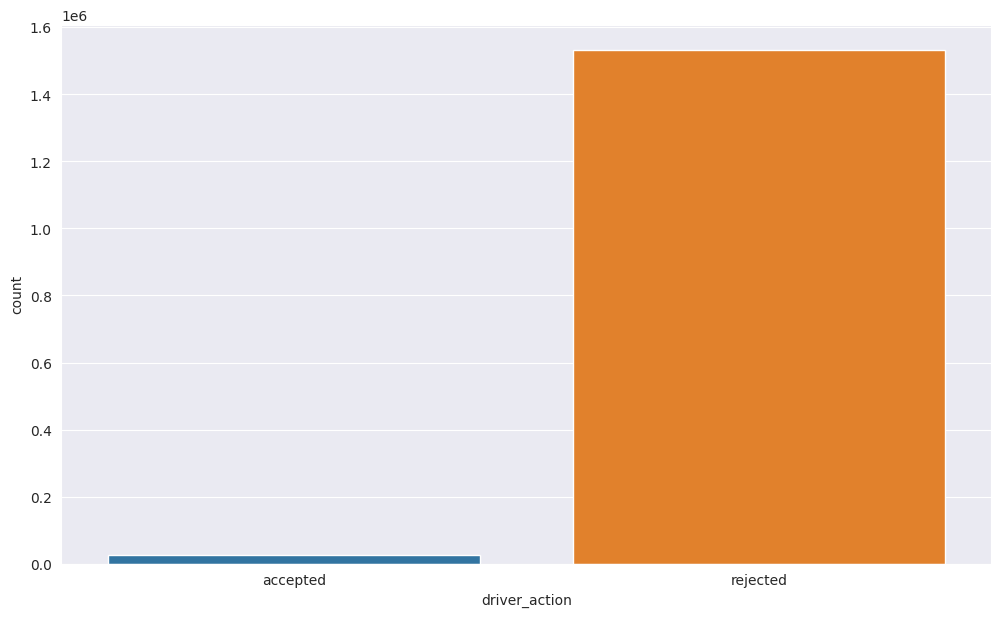

In [61]:
#Count Plot
sns.countplot(x="driver_action", data=df)